In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [15]:
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
x_w_noise = np.hstack([cancer.data, noise])

In [16]:
cancer.data.shape

(569, 30)

In [17]:
x_w_noise.shape

(569, 80)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
x_w_noise, cancer.target, random_state=0, test_size=.5)

In [23]:
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
x_train_selected = select.transform(X_train)
print(X_train.shape)
print(x_train_selected.shape)

(284, 80)
(284, 40)


In [25]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Trun 는 검은색 False는 흰색

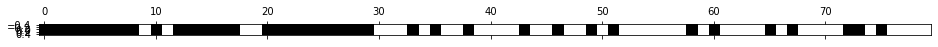

In [28]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

Text(0.5, 0, '특성번호')

C:\Programmierung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Programmierung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Programmierung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Programmierung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Programmierung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Programmierung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 4945

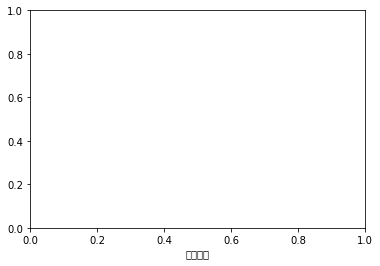

In [29]:
plt.xlabel("특성번호")

([<matplotlib.axis.YTick at 0x278621788e0>], [Text(0, 0, '')])

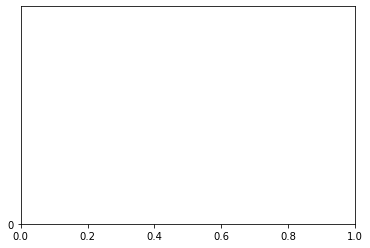

In [30]:
plt.yticks([0])

In [33]:
# p312
import mglearn
citibike = mglearn.datasets.load_citibike()
citibike[:3]

starttime
2015-08-01 00:00:00    3
2015-08-01 03:00:00    0
2015-08-01 06:00:00    9
Freq: 3H, Name: one, dtype: int64

In [37]:
import pandas as pd
plt.figure(figsize=(10, 3))
xticks=pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')

<Figure size 720x216 with 0 Axes>

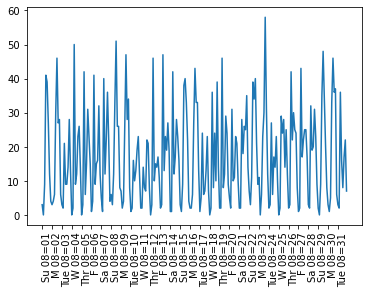

In [41]:
week=["M","Tue","W","Thr","F","Sa","Su",]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m=%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike)
plt.show()